In [ ]:
from osgeo import gdal_array
import matplotlib.pyplot as plt
import numpy as np
import glob

# Data Uploading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip '/content/drive/My Drive/Train_Data.zip'

Archive:  /content/drive/My Drive/Train_Data.zip
   creating: Train Data/ROAD_FCC/
  inflating: Train Data/ROAD_FCC/0.tif  
  inflating: Train Data/ROAD_FCC/1.tif  
  inflating: Train Data/ROAD_FCC/10.tif  
  inflating: Train Data/ROAD_FCC/1000.tif  
  inflating: Train Data/ROAD_FCC/1001.tif  
  inflating: Train Data/ROAD_FCC/1002.tif  
  inflating: Train Data/ROAD_FCC/1003.tif  
  inflating: Train Data/ROAD_FCC/1004.tif  
  inflating: Train Data/ROAD_FCC/1005.tif  
  inflating: Train Data/ROAD_FCC/1006.tif  
  inflating: Train Data/ROAD_FCC/1007.tif  
  inflating: Train Data/ROAD_FCC/1008.tif  
  inflating: Train Data/ROAD_FCC/1009.tif  
  inflating: Train Data/ROAD_FCC/101.tif  
  inflating: Train Data/ROAD_FCC/1010.tif  
  inflating: Train Data/ROAD_FCC/1011.tif  
  inflating: Train Data/ROAD_FCC/1013.tif  
  inflating: Train Data/ROAD_FCC/1015.tif  
  inflating: Train Data/ROAD_FCC/1017.tif  
  inflating: Train Data/ROAD_FCC/1018.tif  
  inflating: Train Data/ROAD_FCC/1019.tif  
  

In [ ]:
!unzip '/content/drive/My Drive/Test_Data.zip'

Archive:  /content/drive/My Drive/Test_Data.zip
   creating: Test Data/ROAD_FCC/
  inflating: Test Data/ROAD_FCC/100.tif  
  inflating: Test Data/ROAD_FCC/1012.tif  
  inflating: Test Data/ROAD_FCC/1014.tif  
  inflating: Test Data/ROAD_FCC/1016.tif  
  inflating: Test Data/ROAD_FCC/1038.tif  
  inflating: Test Data/ROAD_FCC/1039.tif  
  inflating: Test Data/ROAD_FCC/1049.tif  
  inflating: Test Data/ROAD_FCC/1051.tif  
  inflating: Test Data/ROAD_FCC/1062.tif  
  inflating: Test Data/ROAD_FCC/1063.tif  
  inflating: Test Data/ROAD_FCC/1077.tif  
  inflating: Test Data/ROAD_FCC/111.tif  
  inflating: Test Data/ROAD_FCC/130.tif  
  inflating: Test Data/ROAD_FCC/17.tif  
  inflating: Test Data/ROAD_FCC/171.tif  
  inflating: Test Data/ROAD_FCC/172.tif  
  inflating: Test Data/ROAD_FCC/175.tif  
  inflating: Test Data/ROAD_FCC/182.tif  
  inflating: Test Data/ROAD_FCC/183.tif  
  inflating: Test Data/ROAD_FCC/184.tif  
  inflating: Test Data/ROAD_FCC/194.tif  
  inflating: Test Data/ROAD_

## Train Data

In [ ]:
#satellite images or input images
fcc_train = '/content/Train Data/ROAD_FCC/*.tif'
fcc_train_files = glob.glob(fcc_train, recursive=True)

#ground truth images or labelled images
gt_train = '/content/Train Data/ROAD_GT/*.tif'
gt_train_files = glob.glob(gt_train, recursive=True)

## Test Data

In [ ]:
#satellite images or input images
fcc_test = '/content/Test Data/ROAD_FCC/*.tif'
fcc_test_files = glob.glob(fcc_test, recursive=True)

#ground truth images or labelled images
gt_test = '/content/Test Data/ROAD_GT/*.tif'
gt_test_files = glob.glob(gt_test, recursive=True)

## Data Verification

In [ ]:
print(len(fcc_train_files))
print(len(gt_train_files))
print(len(fcc_test_files))
print(len(gt_test_files))

973
973
107
107


# Data Pre-Processing

## Converting Image Datasets into an array

### Training Folder

Satellite Images or Input Images

In [ ]:
fcc_train_array = []
for filee in fcc_train_files:
  rasterArray = gdal_array.LoadFile(filee)
  fcc_train_array.append(rasterArray)
fcc_train_array = np.array(fcc_train_array)
print('Shape of an array')
print(f'Before Reshaping: {fcc_train_array.shape}')
fcc_train_array = fcc_train_array.reshape(len(fcc_train_files), 128, 128, 3)
print(f'After Reshaping: {fcc_train_array.shape}')

Shape of an array
Before Reshaping: (973, 3, 128, 128)
After Reshaping: (973, 128, 128, 3)


Ground Truth Images or Labelled Images

In [ ]:
gt_train_array = []
for filee in gt_train_files:
  rasterArray = gdal_array.LoadFile(filee)
  gt_train_array.append(rasterArray)
gt_train_array = np.array(gt_train_array)
print('Shape of an array')
print(f'Before Reshaping: {gt_train_array.shape}')
gt_train_array = gt_train_array.reshape(len(gt_train_files), 128, 128, 1)
print(f'After Reshaping: {gt_train_array.shape}')

Shape of an array
Before Reshaping: (973, 128, 128)
After Reshaping: (973, 128, 128, 1)


### Testing Folder

Satellite Images or Input Images

In [ ]:
fcc_test_array = []
for filee in fcc_test_files:
  rasterArray = gdal_array.LoadFile(filee)
  fcc_test_array.append(rasterArray)
fcc_test_array = np.array(fcc_test_array)
print('Shape of an array')
print(f'Before Reshaping: {fcc_test_array.shape}')
fcc_test_array = fcc_test_array.reshape(len(fcc_test_files), 128, 128, 3)
print(f'After Reshaping: {fcc_test_array.shape}')

Shape of an array
Before Reshaping: (107, 3, 128, 128)
After Reshaping: (107, 128, 128, 3)


Ground Truth Images or Labelled Images

In [ ]:
gt_test_array = []
for filee in gt_test_files:
  rasterArray = gdal_array.LoadFile(filee)
  gt_test_array.append(rasterArray)
gt_test_array = np.array(gt_test_array)
print('Shape of an array')
print(f'Before Reshaping: {gt_test_array.shape}')
gt_test_array = gt_test_array.reshape(len(gt_test_files), 128, 128, 1)
print(f'After Reshaping: {gt_test_array.shape}')

Shape of an array
Before Reshaping: (107, 128, 128)
After Reshaping: (107, 128, 128, 1)


## Image Rescaling

In [ ]:
fcc_train_array = fcc_train_array / np.max(fcc_train_array)
fcc_test_array = fcc_test_array / np.max(fcc_test_array)

## Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
aug = ImageDataGenerator(rotation_range=10,
horizontal_flip=True,
vertical_flip=True,
width_shift_range=0.1,
height_shift_range=0.1,
)

# TPU Connections

In [ ]:
import tensorflow as tf
import os
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

INFO:tensorflow:Initializing the TPU system: grpc://10.59.49.114:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.59.49.114:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU')]


In [ ]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


# Model Building

In [ ]:
from keras.models import * 
from keras.layers import *
from keras.applications.resnet50 import ResNet50
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint 
from numpy.testing import assert_allclose
from keras import backend as k
from keras.models import load_model

In [ ]:
batch_size = 32
epochs = 25

In [ ]:
with strategy.scope():
 
  def resnet(x, input_shape):
      
      # Decreases the dimensions of the input image by a factor of 32
      x = ResNet50(include_top=False, weights=None,input_tensor=x ,input_shape=(128,128,3)).output

      # Upsampling by 4 so that we get an output feature map of size 1/8th of the initial image
      x = UpSampling2D(size = (4,4))(x)      
      
      return x
 
  def pyramid_pooling_module(x):  
 
    layer1 = AveragePooling2D(pool_size=(1,1))(x)
    layer1 = Conv2D(filters=64,kernel_size=(1,1))(layer1)
    layer1 = BatchNormalization()(layer1)
    layer1 = UpSampling2D(size=1,interpolation='bilinear',name='red_layer')(layer1)
    
    layer2 = AveragePooling2D(pool_size=(2,2))(x)
    layer2 = Conv2D(filters=64,kernel_size=(1,1))(layer2)
    layer2 = BatchNormalization()(layer2)
    layer2 = UpSampling2D(size=2,interpolation='bilinear',name='orange_layer')(layer2)
  
    layer3 = AveragePooling2D(pool_size=(4,4))(x)
    layer3 = Conv2D(filters=64,kernel_size=(1,1))(layer3)
    layer3 = BatchNormalization()(layer3)
    layer3 = UpSampling2D(size=4,interpolation='bilinear',name='blue_layer')(layer3)
  
    layer4 = AveragePooling2D(pool_size=(8,8))(x)
    layer4 = Conv2D(filters=64,kernel_size=(1,1))(layer4)
    layer4 = BatchNormalization()(layer4)
    layer4 = UpSampling2D(size=8,interpolation='bilinear',name='green_layer')(layer4)
  
    concatenated = Concatenate()([x, layer1, layer2, layer3, layer4])
 
    return concatenated
 
 
  def PSPNet(n_classes = 1, input_shape = (128, 128, 3)):
 
    # Input to the model
    input = Input(input_shape)
 
    # resnet architecture
    X = resnet(input, input_shape)
 
    # pyramid pooling module
    ppm_output = pyramid_pooling_module(X)
 
    # final conv layers and output layer
    up1 = UpSampling2D(size=8)(ppm_output)
    cd1 = Conv2D(256, 3, activation = 'relu', padding='same')(up1)
    bn1 = BatchNormalization()(cd1)
    d1 = Dropout(0.5)(bn1)
    cd2 = Conv2D(256, 3, activation = 'relu', padding='same')(d1)
    bn2 = BatchNormalization()(cd2)
    d2 = Dropout(0.5)(bn2)
    cd3 = Conv2D(512, 3, activation = 'relu', padding='same')(d2)
    bn3 = BatchNormalization()(cd3)
    d3 = Dropout(0.5)(bn3)
    output = Conv2D(n_classes, 1, activation='sigmoid')(d3)
 
    roadModel = Model(inputs=input, outputs=output)

    adam = Adam(learning_rate=0.0001)
    roadModel.compile(loss='binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

    roadModel.summary()
 
    return roadModel
 
roadModel = PSPNet()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

# Splitting Data into Validation Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
(trainX, validX, trainY, validY) = train_test_split(fcc_train_array, gt_train_array,
    test_size=0.1, random_state=42)

# Fitting Data onto a Model

In [ ]:
roadModel = load_model('/content/drive/My Drive/roadModel4.h5')

In [ ]:
roadModel_train = roadModel.fit(
	x=aug.flow(trainX, trainY, batch_size=batch_size),
	validation_data=(validX, validY),
	epochs=2,
  verbose=1,
  steps_per_epoch=len(trainX)//batch_size
	)

Epoch 1/2
27/27 [==============================] - 590s 22s/step - loss: 0.3254 - accuracy: 0.8952 - val_loss: 0.3441 - val_accuracy: 0.8933
Epoch 2/2
27/27 [==============================] - 579s 21s/step - loss: 0.3240 - accuracy: 0.8954 - val_loss: 0.3461 - val_accuracy: 0.8933


In [ ]:
# roadModel.save('/content/drive/My Drive/roadModel4.h5')

# Plotting Results 

## Training Loss v/s Validation Loss

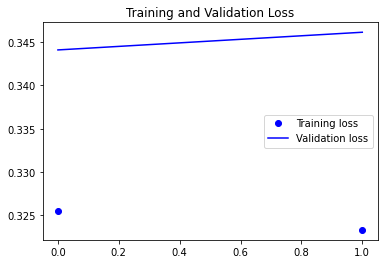

In [ ]:
loss = roadModel_train.history['loss']
val_loss = roadModel_train.history['val_loss']
epochs = range(2)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Training Accuracy v/s Validation Accuracy

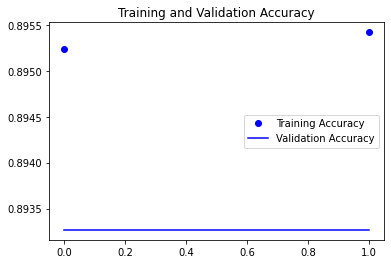

In [ ]:
acc = roadModel_train.history['accuracy']
val_acc = roadModel_train.history['val_accuracy']
epochs = range(2)
plt.figure()
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Model Evaluation

In [ ]:
x_test = fcc_test_array 
y_test = gt_test_array
x_train = fcc_train_array
y_train = gt_train_array

In [ ]:
train_score = roadModel.evaluate(x_train, y_train, verbose = 0) 
test_score = roadModel.evaluate(x_test, y_test, verbose = 0) 
print('Training loss:', train_score[0]) 
print('Training accuracy:', train_score[1])
print('Testing loss:', test_score[0]) 
print('Testing accuracy:', test_score[1])

Training loss: 0.34559188800014917
Training accuracy: 0.8950809836387634
Testing loss: 0.36088700077244057
Testing accuracy: 0.888042688369751


# Model Prediction

In [ ]:
y_pred = roadModel.predict(x_test) 
print(y_pred)

# [
#  0 to 0.5 - non road
#  0.5 to 1 - road
# ]
# road non-road
# [[0.3, 0.7],
#  [0.6, 0.4]
#  ....
#  ....
#  ]

[[[[0.10821348]
   [0.1144186 ]
   [0.11686403]
   ...
   [0.07061741]
   [0.07923633]
   [0.08950239]]

  [[0.1179454 ]
   [0.12585878]
   [0.12642202]
   ...
   [0.0596213 ]
   [0.07033756]
   [0.08406043]]

  [[0.11780468]
   [0.12517798]
   [0.12595525]
   ...
   [0.05674267]
   [0.06711823]
   [0.08137122]]

  ...

  [[0.09271896]
   [0.08713096]
   [0.08184013]
   ...
   [0.07117712]
   [0.07865083]
   [0.08815172]]

  [[0.09815076]
   [0.09525278]
   [0.08985639]
   ...
   [0.08015269]
   [0.08731851]
   [0.09441698]]

  [[0.09852374]
   [0.09799165]
   [0.0947493 ]
   ...
   [0.08875817]
   [0.09332904]
   [0.0966436 ]]]


 [[[0.11451781]
   [0.12435335]
   [0.12655282]
   ...
   [0.07943678]
   [0.0881162 ]
   [0.09487787]]

  [[0.12531161]
   [0.14016521]
   [0.14120373]
   ...
   [0.07006505]
   [0.08164862]
   [0.09149256]]

  [[0.1264292 ]
   [0.14228806]
   [0.14285439]
   ...
   [0.06621155]
   [0.07796159]
   [0.08846864]]

  ...

  [[0.09406701]
   [0.08918563]
   [0.0

In [ ]:
print(type(y_pred))
print(y_pred.shape)
print(np.max(y_pred))
print(np.min(y_pred))
print(np.average(y_pred))

<class 'numpy.ndarray'>
(107, 128, 128, 1)
0.20012817
0.0
0.074815884


In [ ]:
from IPython.display import clear_output

In [ ]:
GT_predict_bool = np.full((107,128,128,3),0)

for i in range(0,107):
  for j in range(0,128):
    for k in range(0,128):
      if y_pred[i][j][k][0]>0.1:
        GT_predict_bool[i][j][k] = 1
  clear_output(wait=True)
  print("Checking : ",round((i/(128-1))*100,3),"%")

Checking :  83.465 %


## Expected Output

In [ ]:
for i in range(107):
  plt.figure()
  img = y_test[i]
  plt.imshow(np.squeeze(img), cmap='gray')

## Our Output

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


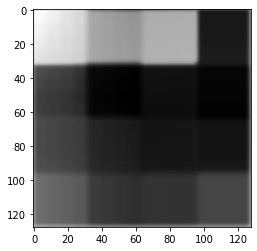

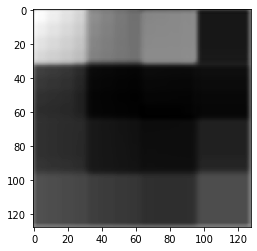

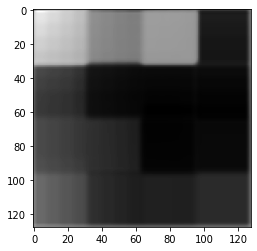

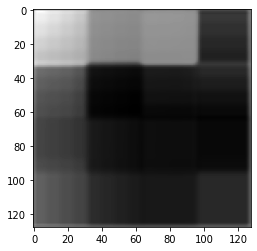

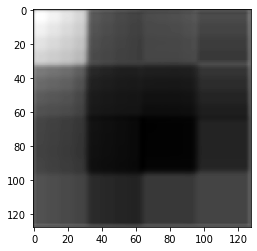

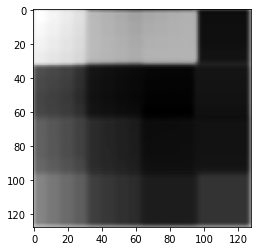

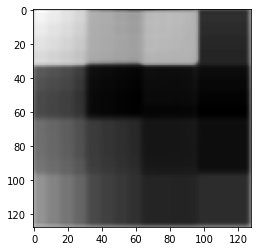

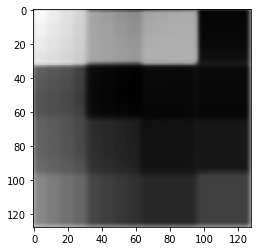

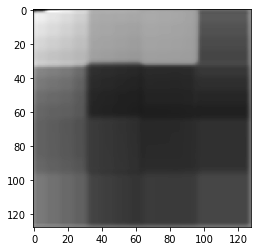

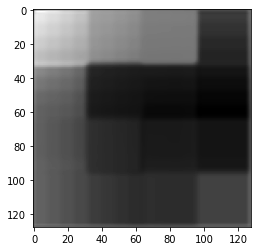

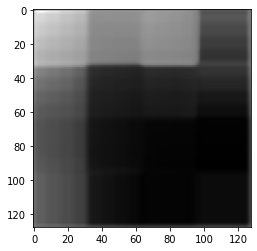

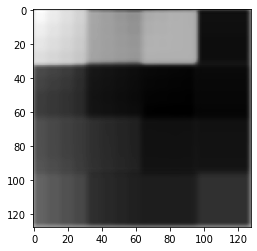

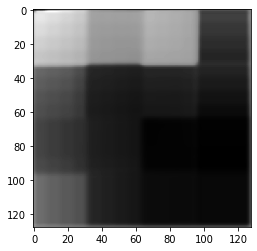

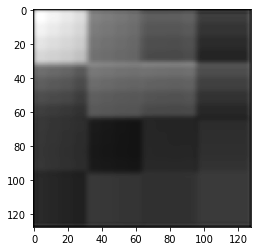

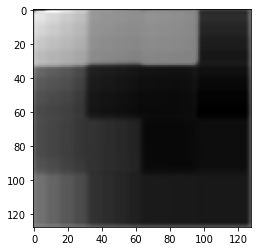

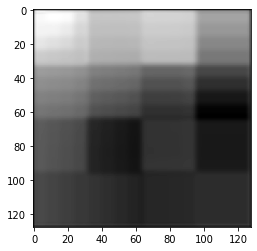

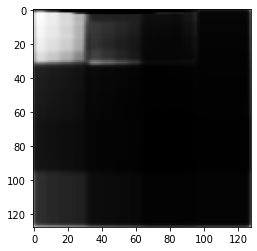

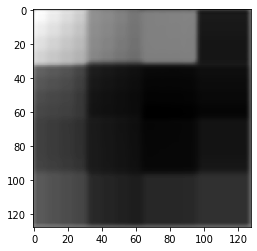

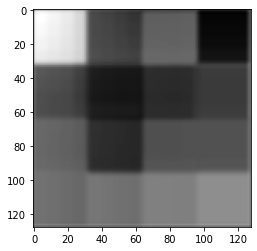

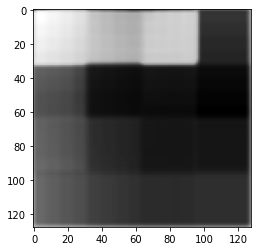

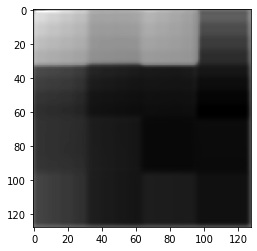

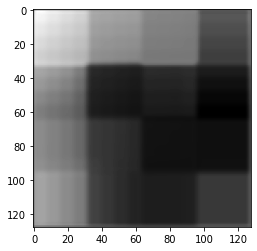

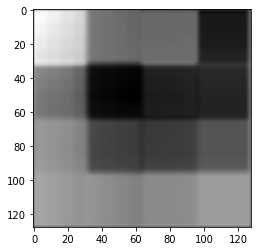

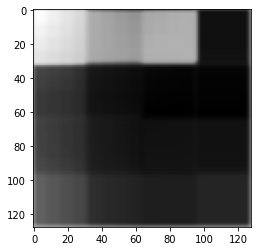

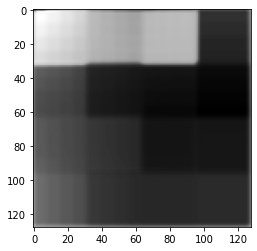

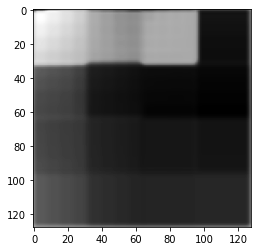

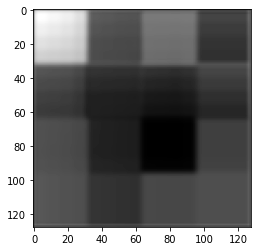

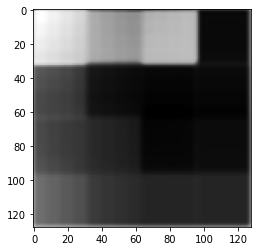

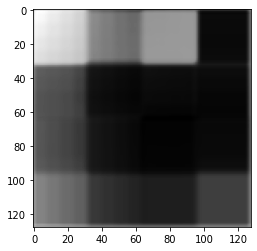

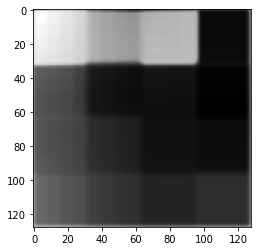

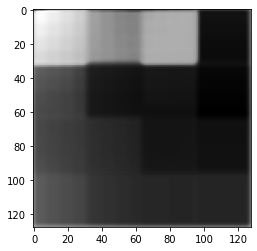

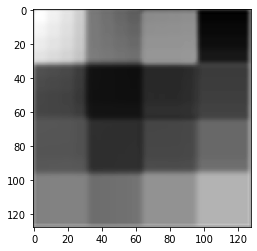

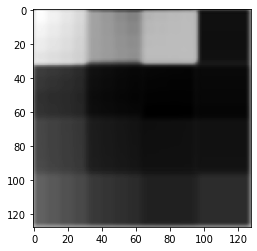

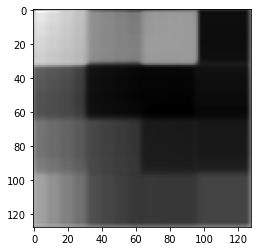

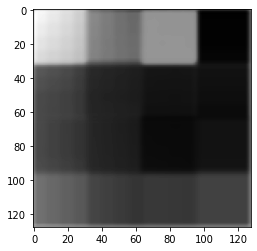

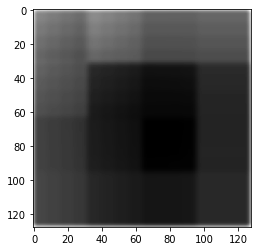

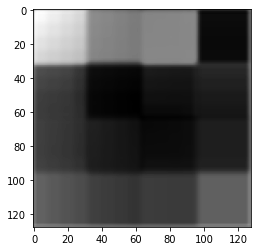

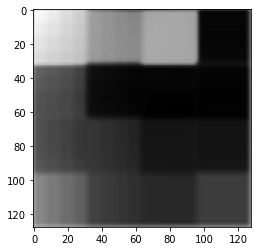

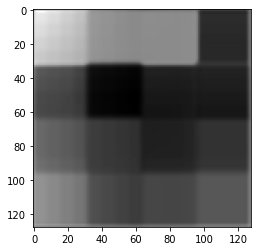

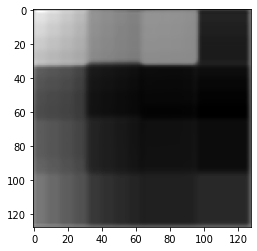

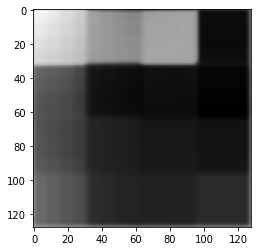

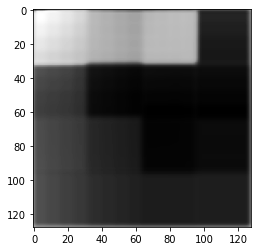

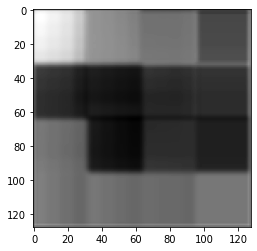

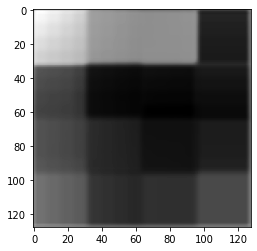

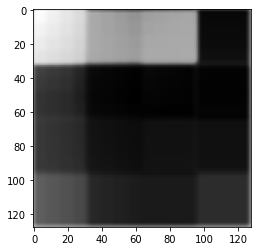

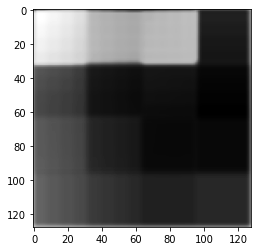

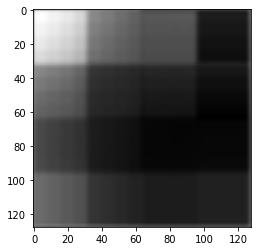

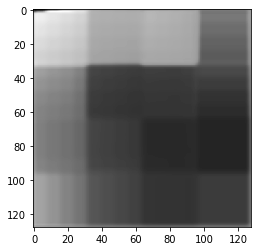

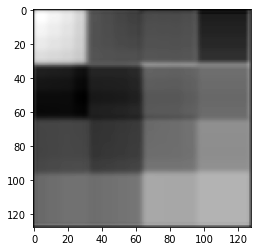

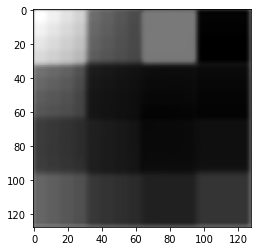

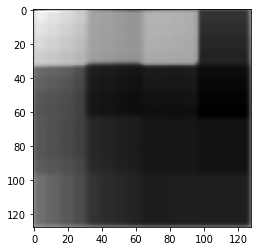

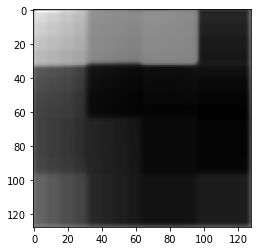

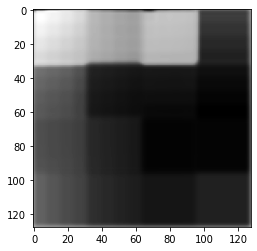

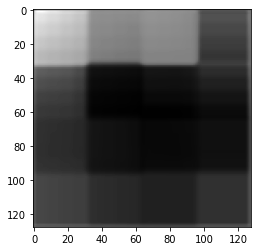

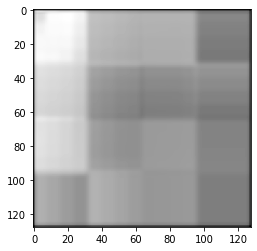

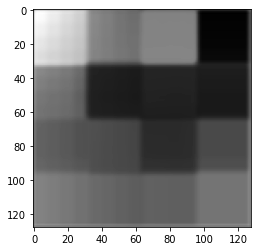

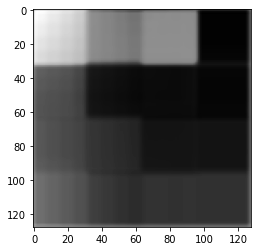

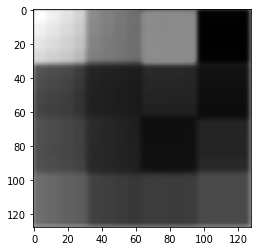

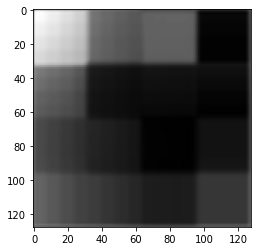

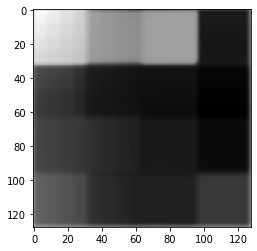

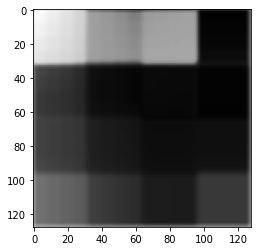

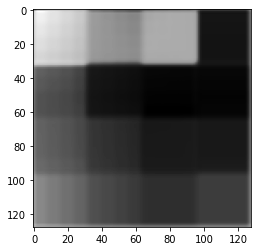

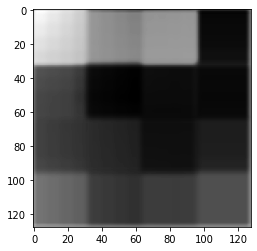

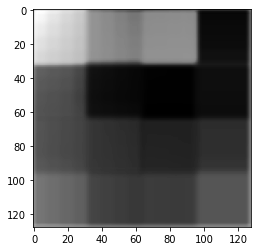

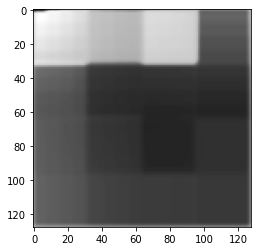

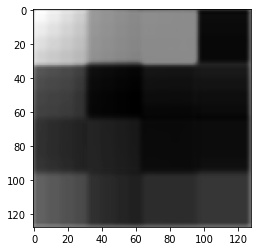

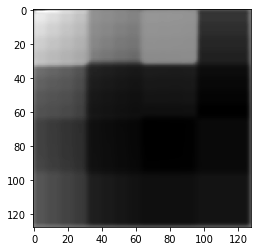

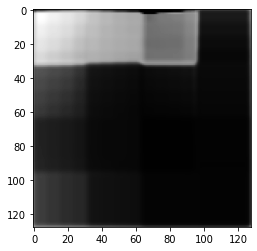

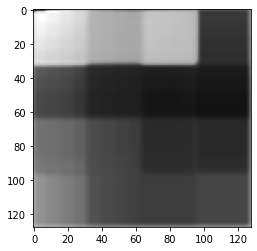

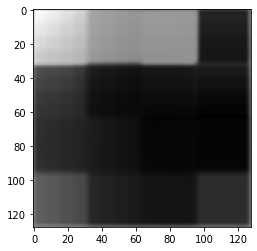

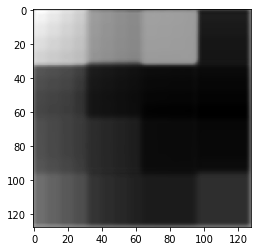

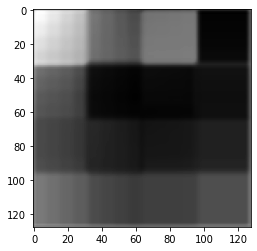

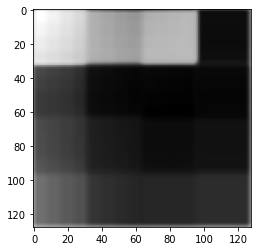

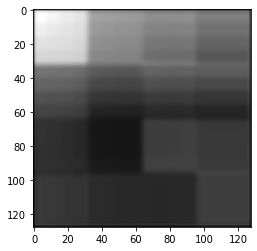

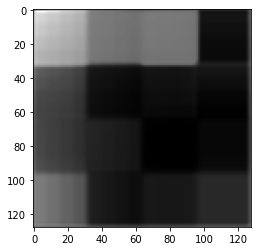

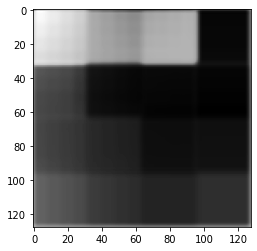

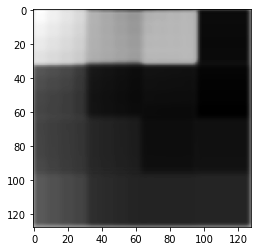

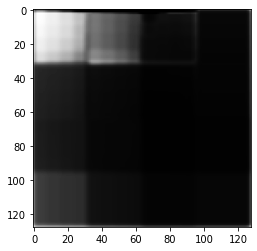

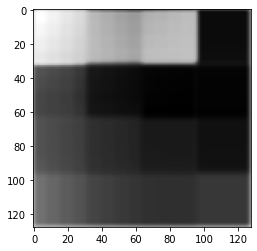

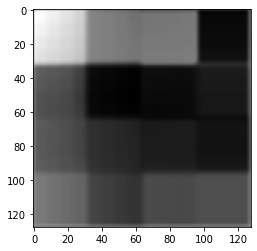

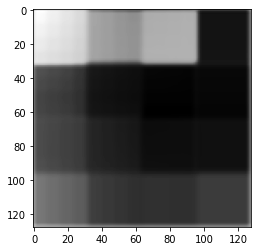

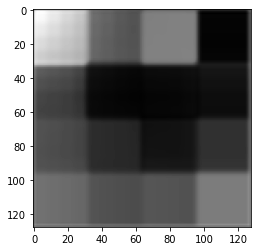

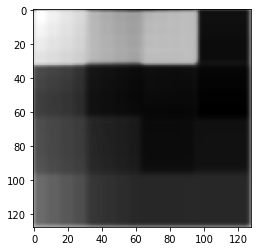

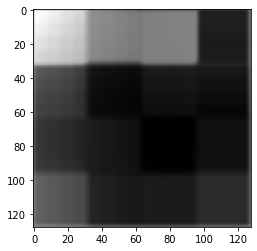

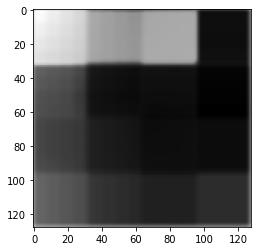

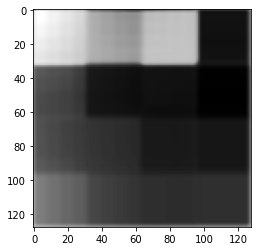

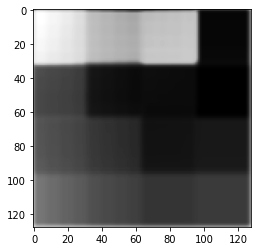

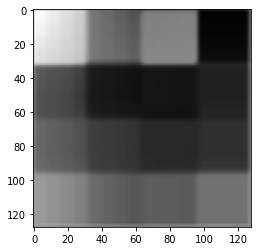

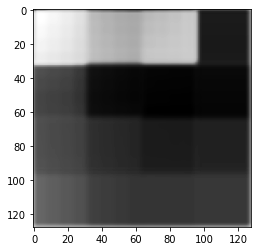

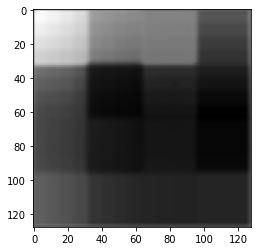

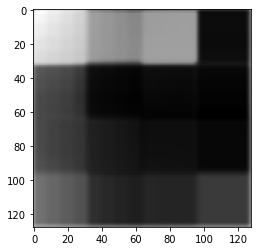

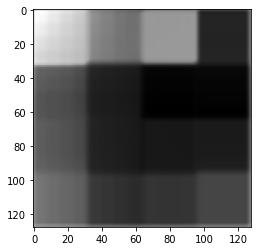

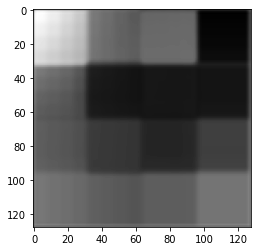

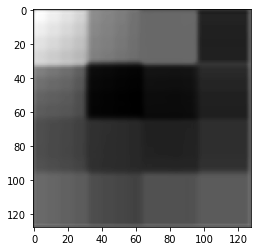

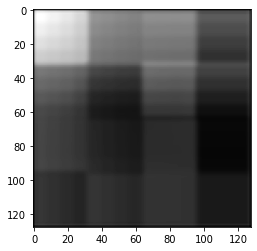

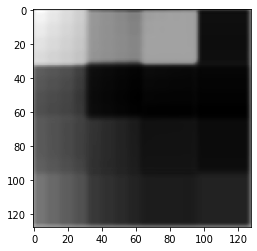

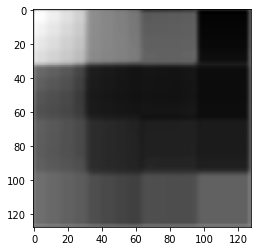

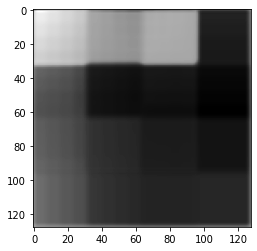

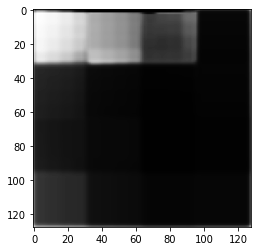

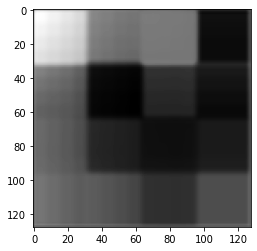

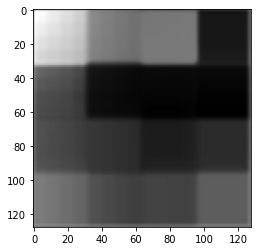

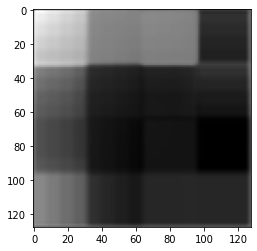

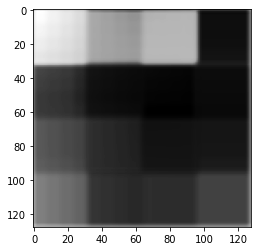

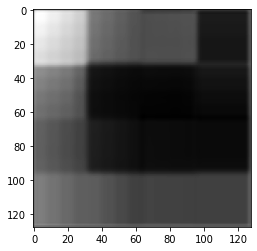

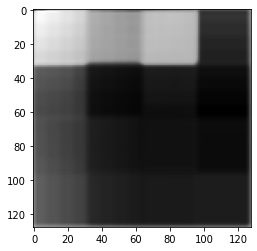

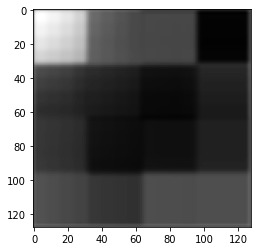

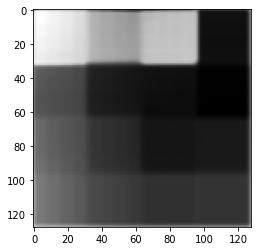

In [ ]:
for i in range(107):
  plt.figure()
  img = y_pred[i]
  plt.imshow(np.squeeze(img), cmap='gray')